In [271]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting Lifts

Weightlifting is a hobby of mine, so I thought it'd be fun and potentially useful to analyze some data pertaining to lifting. To that end, I will be analyzing a dataset of powerlifters from Kaggle and building regression models to predict the strength of their lifts.

Powerlifting is a sport where athletes compete to see who can lift the most weight. The standard lifts in competitions are the bench press, the squat, and the deadlift. Lifters must use proper form while lifting, or the lift will not be counted by the judges. The competition performances of many lifters, along with details about them such as their age, sex, weight, and steroid test status are included in a [dataset available on Kaggle](https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database), which I will import now.

In [272]:
#Import the data
lift_data = pd.read_csv('openpowerlifting.csv', encoding = "ISO-8859-1")

C:\Users\phyis\AppData\Local\Temp\ipykernel_32396\865326665.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  lift_data = pd.read_csv('openpowerlifting.csv', encoding = "ISO-8859-1")


In [273]:
lift_data['BodyweightSq'] = lift_data['BodyweightKg']**2

In [274]:
lift_data.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,BodyweightSq
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3576.04
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3422.25
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3069.16
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3600.00
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,10816.00


In [335]:
lift_data.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName',
       'BodyweightSq'],
      dtype='object')

I will try to predict the best lifts. Based on my knowledge of weightlifting, I think the following features will be useful to predicting the best lifts:

In [276]:
relevant_cols = ['Sex', 'Equipment', 'Age', 'BodyweightKg', 'Tested']

Let's see if this data is clean.

In [277]:
lift_data.Sex.unique()

array(['F', 'M'], dtype=object)

OK, the Sex column looks pretty well behaved, no nans or anything else weird that would require cleaning.

In [278]:
lift_data.Age.unique()

array([29. , 40. , 23. , 45. , 37. , 35. , 36. , 34. , 27. , 38. , 19. ,
       30. , 50. , 49. , 33. , 31. , 48. , 28. , 26. , 42. , 17. , 80. ,
       32. , 21. , 24. , 22. , 41. , 25. , 20. , 72. , 47. , 39. ,  nan,
       44. , 51. , 52. , 43. , 66. , 15. , 60. , 18. , 14. , 54. , 16. ,
       63. , 46. , 70. , 65. , 53. , 55. , 68. , 61. , 75. , 64. , 56. ,
       25.5, 74. , 59. , 62. , 69. , 10. , 71. , 57. , 67. , 58. , 73. ,
       31.5, 13. , 34.5, 84. , 78. , 19.5, 24.5, 79. , 20.5, 17.5, 37.5,
       26.5, 33.5, 40.5, 16.5, 14.5, 28.5, 32.5, 47.5, 46.5, 54.5, 52.5,
       49.5, 74.5, 15.5, 18.5, 22.5, 30.5, 27.5, 23.5, 41.5, 36.5, 44.5,
       45.5, 58.5, 51.5, 50.5, 62.5, 68.5, 59.5, 61.5, 65.5, 72.5, 76.5,
       21.5, 29.5, 42.5, 57.5, 53.5, 63.5, 38.5, 43.5, 55.5, 56.5, 64.5,
       60.5, 70.5, 35.5, 39.5, 69.5, 73.5, 77.5, 75.5, 76. , 48.5, 80.5,
       77. , 78.5, 67.5, 66.5, 81.5, 86.5, 71.5, 81. , 79.5, 13.5, 85.5,
       12.5, 11. , 12. , 11.5, 10.5,  4.5,  3.5,  8

That's funny. Since when do they let 0-year-olds into powerlifting meets? Let's see who these people are:

In [279]:
lift_data[lift_data.Age==0]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,BodyweightSq
85488,Sean Sullivan,M,SBD,Single-ply,0.0,NaN,NaN,75.0,75,200.0,...,422.18,549.16,NaN,NaN,USPF,1994-07-29,USA,TX,Senior Nationals,5625.00
92469,Calvin Davis,M,D,Multi-ply,0.0,NaN,Masters 70-74,125.0,125,NaN,...,94.99,311.50,Yes,USA,WABDL,1997-11-29,USA,OR,Miller Lite World BP/DL,15625.00
92625,Calvin Davis,M,B,Multi-ply,0.0,NaN,Masters 70-74,125.0,125,NaN,...,65.13,352.75,Yes,USA,WABDL,1997-11-29,USA,OR,Miller Lite World BP/DL,15625.00
116324,J. Johnson,M,B,Single-ply,0.0,NaN,Teen 16-17,90.0,90,NaN,...,NaN,NaN,NaN,NaN,USPF,1997-02-22,USA,OR,Bench Press Nationals,8100.00
121801,Phillip Garcia,M,B,Multi-ply,0.0,NaN,Teen 16-17,125.0,125,NaN,...,116.70,516.86,Yes,NaN,WABDL,1998-05-09,USA,TX,National Bench press,15625.00
212204,Brett Johnston,M,B,Single-ply,0.0,NaN,Under 17,100.0,100,NaN,...,36.56,274.25,Yes,NaN,PA,2000-01-01,Australia,NaN,Schools Bench Press,10000.00
1303887,Ryan Cooper,M,SBD,Single-ply,0.0,NaN,Open,94.5,100,NaN,...,294.09,395.87,Yes,NaN,CPU,1999-08-07,Canada,NL,Classic Powerlifting Championships,8930.25
1380602,O. Garcia,M,SBD,Single-ply,0.0,NaN,Open,53.6,56,NaN,...,340.35,443.55,Yes,Guatemala,NAPF,1996-08-17,Canada,ON,Pan-American Powerlifting Championships,2872.96


Sean Sullivan is a 75 kg 0-year-old with a 200 kg first-attempt squat. Guess I better throw my powerlifting shoes in the trash. 

This is a problem. Let's see how big of a problem it is by counting the number of people whose given age is lower than the lowest of the lowest age class.

In [280]:
lift_data.AgeClass.unique()

array(['24-34', '40-44', '20-23', '45-49', '35-39', '18-19', '50-54',
       '16-17', '80-999', '70-74', nan, '65-69', '13-15', '60-64',
       '55-59', '75-79', '5-12'], dtype=object)

In [281]:
print('Baby lifters:',lift_data[lift_data.Age < 5].shape[0])
print('Everybody else:',lift_data[lift_data.Age >= 5].shape[0])
print('Percentage of lifters who are babies:',round(lift_data[lift_data.Age < 5].shape[0]/lift_data[lift_data.Age >= 5].shape[0],5), '%')

Baby lifters: 188
Everybody else: 757339
Percentage of lifters who are babies: 0.00025 %


We can safely throw away these weirdos. Before I do that, however, we also need to look at the nans in Age.

In [282]:
print('Number of Age NaN lifters:',lift_data[np.isnan(lift_data.Age)].shape[0])

Number of Age NaN lifters: 665827


That's a lot of nans! Still, this is a large dataset. I think I'll just drop these observations and train only on the data where age is included and is greater than 5.

In [283]:
#Remove age anomalies
lift_data = lift_data[lift_data['Age'] > 5]

#Reset index
lift_data.reset_index(drop=True,inplace=True)

In [284]:
lift_data

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,BodyweightSq
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3576.04
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3422.25
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3069.16
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,3600.00
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,10816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757318,Marian Cafalik,M,SBD,Raw,60.5,60-64,Masters 2,73.5,74,160.0,...,316.52,469.67,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,5402.25
757319,Marian Piwowarczyk,M,SBD,Raw,55.5,55-59,Masters 2,63.5,66,90.0,...,295.66,423.03,Yes,Poland,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,4032.25
757320,Andrzej Bryniarski,M,SBD,Raw,62.5,60-64,Masters 2,94.4,105,140.0,...,264.22,378.84,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,8911.36
757321,StanisÅaw Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,6528.64


Let's check the other features for nans.

In [285]:
print('Equipment contains nulls:',lift_data.Equipment.isnull().values.any())
print('BodyweightKg contains nulls:',lift_data.BodyweightKg.isnull().values.any())
print('Tested contains nulls:',lift_data.Tested.isnull().values.any())

Equipment contains nulls: False
BodyweightKg contains nulls: True
Tested contains nulls: True


OK, so we need to deal with BodyWeightKg and Tested. Let's see how much of BodyweightKg is junk:

In [286]:
print('Percentage of nulls in BodyweightKg:',round(lift_data.BodyweightKg.isnull().values.sum()
                                             /(~lift_data.BodyweightKg.isnull().values).sum(),3)*100, '%')

Percentage of nulls in BodyweightKg: 0.5 %


Not bad. We can impute that.

What about Tested?

In [287]:
lift_data.Tested.unique()

array([nan, 'Yes'], dtype=object)

The nans here are just a stand-in for people who don't say they were tested for drugs. I imagine that they might perform a bit better than the 'Yes' folks. Anyway, we can just convert this into a Boolean variable.

In [288]:
#Convert Sex and Tested features to binary encodings
sex_binary_list = [0 if (lift_data.Sex[i]=='M') else 1 for i in range(0,lift_data.Sex.shape[0])]
tested_binary_list = [1 if (lift_data.Tested[i]=='Yes') else 0 for i in range(0,lift_data.Tested.shape[0])]

In [289]:
#Convert BodyweightKg NaNs to 0
#Imputer won't recognize the current nans for some reason??

#Cache this series for efficiency
null_bools = lift_data.BodyweightKg.isnull();

bodyweight_goodnan_list = [lift_data.BodyweightKg[i] if ~(null_bools[i]) else 0 for i in range(0,lift_data.BodyweightKg.shape[0])]

What about the targets? Do they have nans?

In [290]:
print('Percentage of nulls in Best3SquatKg:',round(lift_data.Best3SquatKg.isnull().values.sum()
                                             /(~lift_data.Best3SquatKg.isnull().values).sum(),3)*100, '%')
print('Percentage of nulls in Best3BenchKg:',round(lift_data.Best3BenchKg.isnull().values.sum()
                                             /(~lift_data.Best3BenchKg.isnull().values).sum(),3)*100, '%')
print('Percentage of nulls in Best3DeadliftKg:',round(lift_data.Best3DeadliftKg.isnull().values.sum()
                                             /(~lift_data.Best3DeadliftKg.isnull().values).sum(),3)*100, '%')

Percentage of nulls in Best3SquatKg: 55.2 %
Percentage of nulls in Best3BenchKg: 11.5 %
Percentage of nulls in Best3DeadliftKg: 40.6 %


Sad. People love to bench. I don't think imputing on target data is reasonable, so I will just make three different models and drop the nans rows before training.

To start, I will make three copies of the data, one for each lift, so that I can safely modify each independently prior to model training.

In [291]:
#Make copy so I don't modify original dataset
bench_data = lift_data.copy()

#Convert Sex and Tested to binary variables
bench_data['Sex_Binary'] = sex_binary_list
bench_data['Tested_Binary'] = tested_binary_list
# bench_data['BodyweightKg'] = bodyweight_goodnan_list
# bench_data['BodyweightSq'] = bodyweightsq_goodnan_list

#Drop missing bench data
bench_data.dropna(axis=0, subset=['Best3BenchKg'], inplace=True);

#Drop negative-valued (failed) bench weights
neg_vals = (bench_data['Best3BenchKg'] <= 0)
bench_data.drop(bench_data[neg_vals].index, inplace=True);

In [292]:
#Make copy so I don't modify original dataset
squat_data = lift_data.copy()

#Convert Sex and Tested to binary variables
squat_data['Sex_Binary'] = sex_binary_list
squat_data['Tested_Binary'] = tested_binary_list
# squat_data['BodyweightKg'] = bodyweight_goodnan_list
# squat_data['BodyweightSq'] = bodyweightsq_goodnan_list

#Drop missing bench data
squat_data.dropna(axis=0, subset=['Best3SquatKg'], inplace=True);

#Drop negative-valued (failed) bench weights
neg_vals = (squat_data['Best3SquatKg'] <= 0)
squat_data.drop(squat_data[neg_vals].index, inplace=True);

In [293]:
#Make copy so I don't modify original dataset
deadlift_data = lift_data.copy()

#Convert Sex and Tested to binary variables
deadlift_data['Sex_Binary'] = sex_binary_list
deadlift_data['Tested_Binary'] = tested_binary_list
# deadlift_data['BodyweightKg'] = bodyweight_goodnan_list
# deadlift_data['BodyweightSq'] = bodyweightsq_goodnan_list

#Drop missing bench data
deadlift_data.dropna(axis=0, subset=['Best3DeadliftKg'], inplace=True);

#Drop negative-valued (failed) bench weights
neg_vals = (deadlift_data['Best3DeadliftKg'] <= 0)
deadlift_data.drop(deadlift_data[neg_vals].index, inplace=True);

Before I train the models, I will create some visualizations of the data to get an idea of the importance of the features. I'll compare men and women on each lift, tested and untested lifters, equipped and unequipped lifters, and I'll plot each lift against the bodyweight of the lifter.

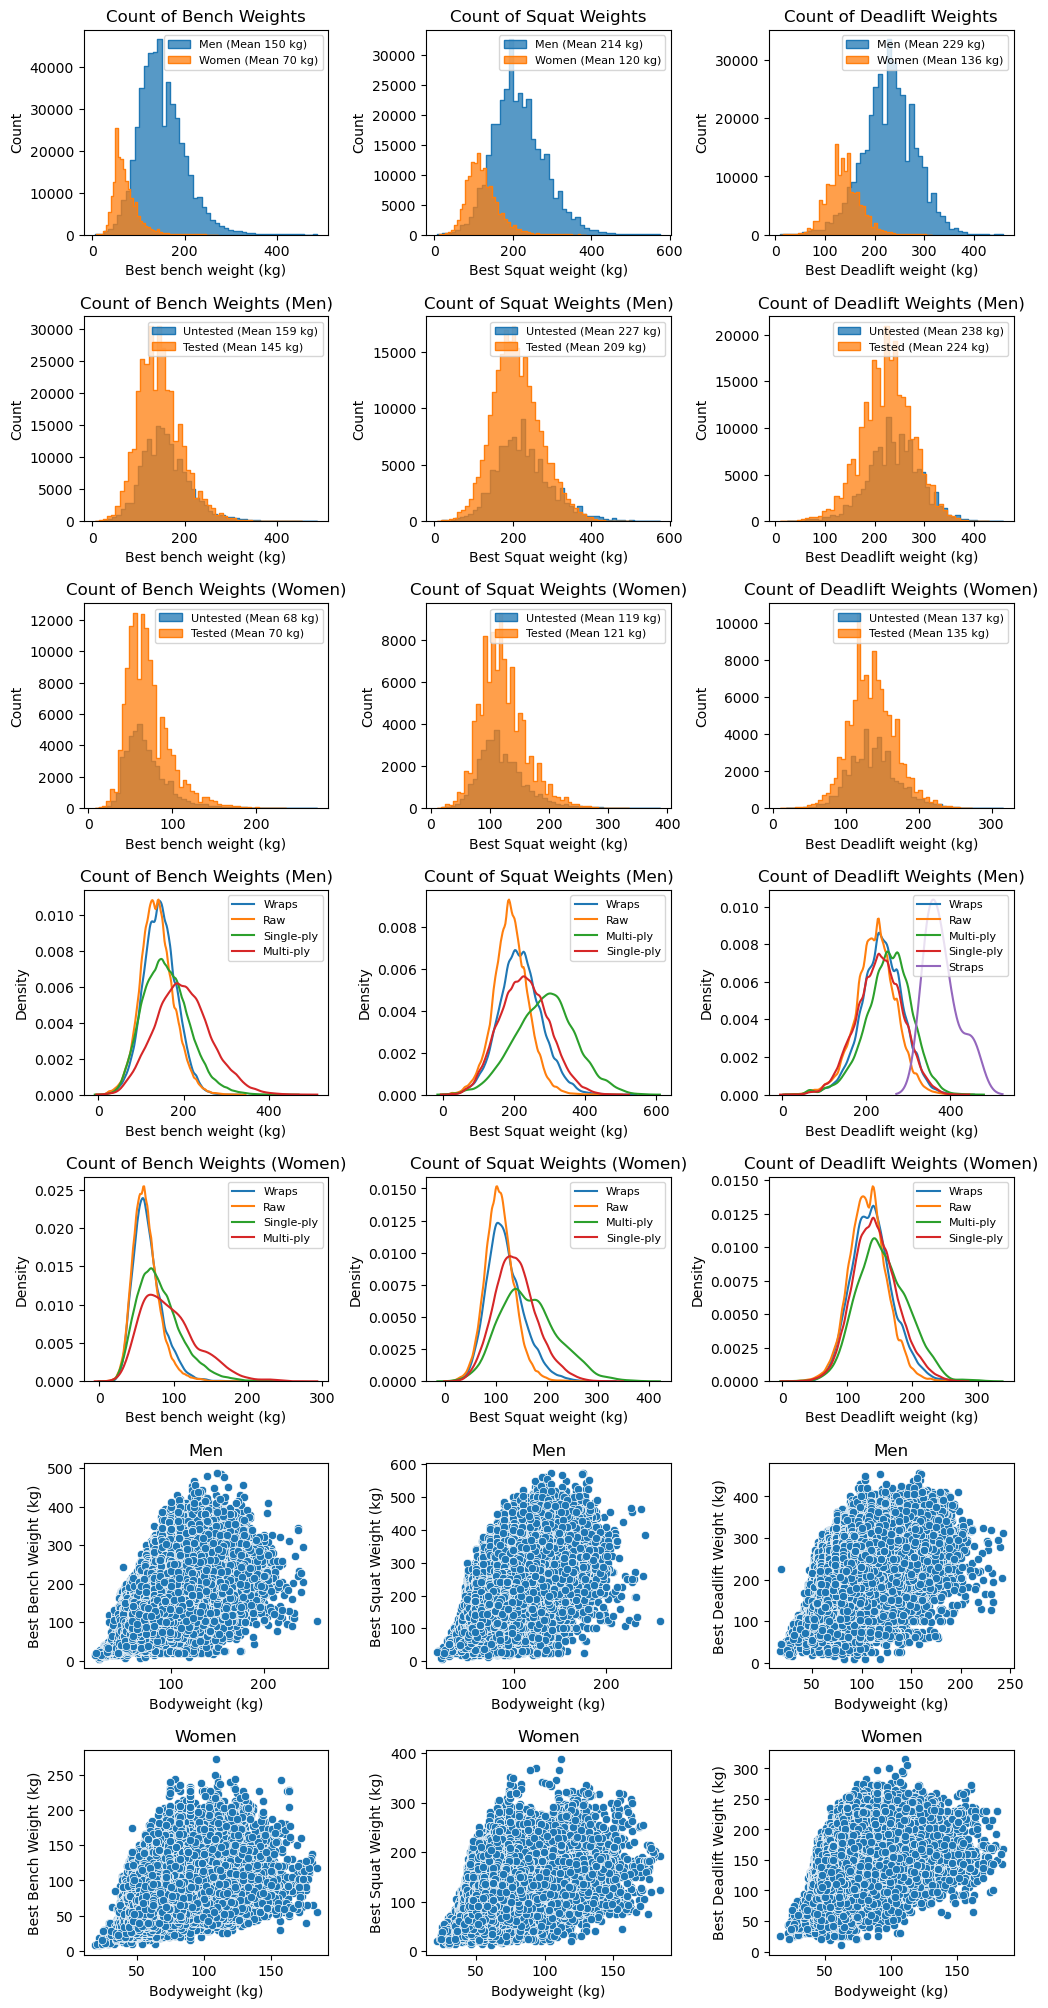

In [294]:
#Hideously discursive data visualization code
fig = plt.figure(figsize=(12,25))

#Bench plots axes
ax1 = fig.add_subplot(7,3,1)
ax2 = fig.add_subplot(7,3,4)
ax3 = fig.add_subplot(7,3,7)
ax4 = fig.add_subplot(7,3,10)
ax5 = fig.add_subplot(7,3,13)
ax6 = fig.add_subplot(7,3,16)
ax7 = fig.add_subplot(7,3,19)

#Squat plots axes
ax8 = fig.add_subplot(7,3,2)
ax9 = fig.add_subplot(7,3,5)
ax10 = fig.add_subplot(7,3,8)
ax11 = fig.add_subplot(7,3,11)
ax12 = fig.add_subplot(7,3,14)
ax13 = fig.add_subplot(7,3,17)
ax14 = fig.add_subplot(7,3,20)

#Deadlift plots axes
ax15 = fig.add_subplot(7,3,3)
ax16 = fig.add_subplot(7,3,6)
ax17 = fig.add_subplot(7,3,9)
ax18 = fig.add_subplot(7,3,12)
ax19 = fig.add_subplot(7,3,15)
ax20 = fig.add_subplot(7,3,18)
ax21 = fig.add_subplot(7,3,21)

#Bench plots
menMean = bench_data[bench_data['Sex_Binary']==0]['Best3BenchKg'].mean()
womenMean = bench_data[bench_data['Sex_Binary']==1]['Best3BenchKg'].mean()

sns.histplot(bench_data[bench_data['Sex_Binary']==0]['Best3BenchKg'],kde=False, label='Men (Mean {} kg)'.format(int(menMean)), bins=50, element='step', ax=ax1)
sns.histplot(bench_data[bench_data['Sex_Binary']==1]['Best3BenchKg'],kde=False, label='Women (Mean {} kg)'.format(int(womenMean)), bins=50, element='step', ax=ax1)

ax1.set_title('Count of Bench Weights')
ax1.set_xlabel('Best bench weight (kg)')

untestedMean = bench_data[(bench_data['Tested_Binary']==0)&(bench_data['Sex_Binary']==0)]['Best3BenchKg'].mean()
testedMean = bench_data[(bench_data['Tested_Binary']==1)&(bench_data['Sex_Binary']==0)]['Best3BenchKg'].mean()

sns.histplot(bench_data[(bench_data['Tested_Binary']==0)&(bench_data['Sex_Binary']==0)]['Best3BenchKg'], label='Untested (Mean {} kg)'.format(int(untestedMean)),bins=50,element='step',ax=ax2)
sns.histplot(bench_data[(bench_data['Tested_Binary']==1)&(bench_data['Sex_Binary']==0)]['Best3BenchKg'], label='Tested (Mean {} kg)'.format(int(testedMean)),bins=50,element='step',ax=ax2)

ax2.set_title('Count of Bench Weights (Men)')
ax2.set_xlabel('Best bench weight (kg)')

untestedMean = bench_data[(bench_data['Tested_Binary']==0)&(bench_data['Sex_Binary']==1)]['Best3BenchKg'].mean()
testedMean = bench_data[(bench_data['Tested_Binary']==1)&(bench_data['Sex_Binary']==1)]['Best3BenchKg'].mean()

sns.histplot(bench_data[(bench_data['Tested_Binary']==0)&(bench_data['Sex_Binary']==1)]['Best3BenchKg'], label='Untested (Mean {} kg)'.format(int(untestedMean)),bins=50,element='step',ax=ax3)
sns.histplot(bench_data[(bench_data['Tested_Binary']==1)&(bench_data['Sex_Binary']==1)]['Best3BenchKg'], label='Tested (Mean {} kg)'.format(int(testedMean)),bins=50,element='step',ax=ax3)

ax3.set_title('Count of Bench Weights (Women)')
ax3.set_xlabel('Best bench weight (kg)')

for i in bench_data.Equipment.unique():
    sns.kdeplot(bench_data[(bench_data['Equipment']=='{}'.format(i))&(bench_data['Sex_Binary']==0)]['Best3BenchKg'],fill=False, label='{}'.format(i), ax=ax4)
    
ax4.set_title('Count of Bench Weights (Men)')
ax4.set_xlabel('Best bench weight (kg)')

for i in bench_data.Equipment.unique():
    sns.kdeplot(bench_data[(bench_data['Equipment']=='{}'.format(i))&(bench_data['Sex_Binary']==1)]['Best3BenchKg'],fill=False, label='{}'.format(i), ax=ax5)
    
ax5.set_title('Count of Bench Weights (Women)')
ax5.set_xlabel('Best bench weight (kg)')

sns.scatterplot(x=bench_data[bench_data['Sex_Binary']==0]['BodyweightKg'], y=bench_data[bench_data['Sex_Binary']==0]['Best3BenchKg'], ax=ax6)

ax6.set_title('Men')
ax6.set_ylabel('Best Bench Weight (kg)')
ax6.set_xlabel('Bodyweight (kg)')

sns.scatterplot(x=bench_data[bench_data['Sex_Binary']==1]['BodyweightKg'], y=bench_data[bench_data['Sex_Binary']==1]['Best3BenchKg'], ax=ax7)

ax7.set_title('Women')
ax7.set_ylabel('Best Bench Weight (kg)')
ax7.set_xlabel('Bodyweight (kg)')

ax1.legend(loc='upper right', fontsize='8')
ax2.legend(loc='upper right', fontsize='8')
ax3.legend(loc='upper right', fontsize='8')
ax4.legend(loc='upper right', fontsize='8')
ax5.legend(loc='upper right', fontsize='8')
# ax6.legend(loc='upper right', fontsize='8')
# ax7.legend(loc='upper right', fontsize='8')

#Squat plots
menMean = squat_data[squat_data['Sex_Binary']==0]['Best3SquatKg'].mean()
womenMean = squat_data[squat_data['Sex_Binary']==1]['Best3SquatKg'].mean()

sns.histplot(squat_data[squat_data['Sex_Binary']==0]['Best3SquatKg'],kde=False, label='Men (Mean {} kg)'.format(int(menMean)), bins=50, element='step', ax=ax8)
sns.histplot(squat_data[squat_data['Sex_Binary']==1]['Best3SquatKg'],kde=False, label='Women (Mean {} kg)'.format(int(womenMean)), bins=50, element='step', ax=ax8)

ax8.set_title('Count of Squat Weights')
ax8.set_xlabel('Best Squat weight (kg)')

untestedMean = squat_data[(squat_data['Tested_Binary']==0)&(squat_data['Sex_Binary']==0)]['Best3SquatKg'].mean()
testedMean = squat_data[(squat_data['Tested_Binary']==1)&(squat_data['Sex_Binary']==0)]['Best3SquatKg'].mean()

sns.histplot(squat_data[(squat_data['Tested_Binary']==0)&(squat_data['Sex_Binary']==0)]['Best3SquatKg'], label='Untested (Mean {} kg)'.format(int(untestedMean)),bins=50,element='step',ax=ax9)
sns.histplot(squat_data[(squat_data['Tested_Binary']==1)&(squat_data['Sex_Binary']==0)]['Best3SquatKg'], label='Tested (Mean {} kg)'.format(int(testedMean)),bins=50,element='step',ax=ax9)

ax9.set_title('Count of Squat Weights (Men)')
ax9.set_xlabel('Best Squat weight (kg)')

untestedMean = squat_data[(squat_data['Tested_Binary']==0)&(squat_data['Sex_Binary']==1)]['Best3SquatKg'].mean()
testedMean = squat_data[(squat_data['Tested_Binary']==1)&(squat_data['Sex_Binary']==1)]['Best3SquatKg'].mean()

sns.histplot(squat_data[(squat_data['Tested_Binary']==0)&(squat_data['Sex_Binary']==1)]['Best3SquatKg'], label='Untested (Mean {} kg)'.format(int(untestedMean)),bins=50,element='step',ax=ax10)
sns.histplot(squat_data[(squat_data['Tested_Binary']==1)&(squat_data['Sex_Binary']==1)]['Best3SquatKg'], label='Tested (Mean {} kg)'.format(int(testedMean)),bins=50,element='step',ax=ax10)

ax10.set_title('Count of Squat Weights (Women)')
ax10.set_xlabel('Best Squat weight (kg)')

for i in squat_data.Equipment.unique():
    sns.kdeplot(squat_data[(squat_data['Equipment']=='{}'.format(i))&(squat_data['Sex_Binary']==0)]['Best3SquatKg'],fill=False, label='{}'.format(i), ax=ax11)
    
ax11.set_title('Count of Squat Weights (Men)')
ax11.set_xlabel('Best Squat weight (kg)')

for i in squat_data.Equipment.unique():
    sns.kdeplot(squat_data[(squat_data['Equipment']=='{}'.format(i))&(squat_data['Sex_Binary']==1)]['Best3SquatKg'],fill=False, label='{}'.format(i), ax=ax12)
    
ax12.set_title('Count of Squat Weights (Women)')
ax12.set_xlabel('Best Squat weight (kg)')

sns.scatterplot(x=squat_data[squat_data['Sex_Binary']==0]['BodyweightKg'], y=squat_data[squat_data['Sex_Binary']==0]['Best3SquatKg'], ax=ax13)

ax13.set_title('Men')
ax13.set_ylabel('Best Squat Weight (kg)')
ax13.set_xlabel('Bodyweight (kg)')

sns.scatterplot(x=squat_data[squat_data['Sex_Binary']==1]['BodyweightKg'], y=squat_data[squat_data['Sex_Binary']==1]['Best3SquatKg'], ax=ax14)

ax14.set_title('Women')
ax14.set_ylabel('Best Squat Weight (kg)')
ax14.set_xlabel('Bodyweight (kg)')

ax8.legend(loc='upper right', fontsize='8')
ax9.legend(loc='upper right', fontsize='8')
ax10.legend(loc='upper right', fontsize='8')
ax11.legend(loc='upper right', fontsize='8')
ax12.legend(loc='upper right', fontsize='8')
# ax13.legend(loc='upper right', fontsize='8')
# ax14.legend(loc='upper right', fontsize='8')

#Deadlift plots
menMean = deadlift_data[deadlift_data['Sex_Binary']==0]['Best3DeadliftKg'].mean()
womenMean = deadlift_data[deadlift_data['Sex_Binary']==1]['Best3DeadliftKg'].mean()

sns.histplot(deadlift_data[deadlift_data['Sex_Binary']==0]['Best3DeadliftKg'],kde=False, label='Men (Mean {} kg)'.format(int(menMean)), bins=50, element='step', ax=ax15)
sns.histplot(deadlift_data[deadlift_data['Sex_Binary']==1]['Best3DeadliftKg'],kde=False, label='Women (Mean {} kg)'.format(int(womenMean)), bins=50, element='step', ax=ax15)

ax15.set_title('Count of Deadlift Weights')
ax15.set_xlabel('Best Deadlift weight (kg)')

untestedMean = deadlift_data[(deadlift_data['Tested_Binary']==0)&(deadlift_data['Sex_Binary']==0)]['Best3DeadliftKg'].mean()
testedMean = deadlift_data[(deadlift_data['Tested_Binary']==1)&(deadlift_data['Sex_Binary']==0)]['Best3DeadliftKg'].mean()

sns.histplot(deadlift_data[(deadlift_data['Tested_Binary']==0)&(deadlift_data['Sex_Binary']==0)]['Best3DeadliftKg'], label='Untested (Mean {} kg)'.format(int(untestedMean)),bins=50,element='step',ax=ax16)
sns.histplot(deadlift_data[(deadlift_data['Tested_Binary']==1)&(deadlift_data['Sex_Binary']==0)]['Best3DeadliftKg'], label='Tested (Mean {} kg)'.format(int(testedMean)),bins=50,element='step',ax=ax16)

ax16.set_title('Count of Deadlift Weights (Men)')
ax16.set_xlabel('Best Deadlift weight (kg)')

untestedMean = deadlift_data[(deadlift_data['Tested_Binary']==0)&(deadlift_data['Sex_Binary']==1)]['Best3DeadliftKg'].mean()
testedMean = deadlift_data[(deadlift_data['Tested_Binary']==1)&(deadlift_data['Sex_Binary']==1)]['Best3DeadliftKg'].mean()

sns.histplot(deadlift_data[(deadlift_data['Tested_Binary']==0)&(deadlift_data['Sex_Binary']==1)]['Best3DeadliftKg'], label='Untested (Mean {} kg)'.format(int(untestedMean)),bins=50,element='step',ax=ax17)
sns.histplot(deadlift_data[(deadlift_data['Tested_Binary']==1)&(deadlift_data['Sex_Binary']==1)]['Best3DeadliftKg'], label='Tested (Mean {} kg)'.format(int(testedMean)),bins=50,element='step',ax=ax17)

ax17.set_title('Count of Deadlift Weights (Women)')
ax17.set_xlabel('Best Deadlift weight (kg)')

for i in deadlift_data.Equipment.unique():
    sns.kdeplot(deadlift_data[(deadlift_data['Equipment']=='{}'.format(i))&(deadlift_data['Sex_Binary']==0)]['Best3DeadliftKg'],fill=False, label='{}'.format(i), ax=ax18)
    
ax18.set_title('Count of Deadlift Weights (Men)')
ax18.set_xlabel('Best Deadlift weight (kg)')

for i in deadlift_data.Equipment.unique():
    sns.kdeplot(deadlift_data[(deadlift_data['Equipment']=='{}'.format(i))&(deadlift_data['Sex_Binary']==1)]['Best3DeadliftKg'],fill=False, label='{}'.format(i), ax=ax19)
    
ax19.set_title('Count of Deadlift Weights (Women)')
ax19.set_xlabel('Best Deadlift weight (kg)')

sns.scatterplot(x=deadlift_data[deadlift_data['Sex_Binary']==0]['BodyweightKg'], y=deadlift_data[deadlift_data['Sex_Binary']==0]['Best3DeadliftKg'], ax=ax20)

ax20.set_title('Men')
ax20.set_ylabel('Best Deadlift Weight (kg)')
ax20.set_xlabel('Bodyweight (kg)')

sns.scatterplot(x=deadlift_data[deadlift_data['Sex_Binary']==1]['BodyweightKg'], y=deadlift_data[deadlift_data['Sex_Binary']==1]['Best3DeadliftKg'], ax=ax21)

ax21.set_title('Women')
ax21.set_ylabel('Best Deadlift Weight (kg)')
ax21.set_xlabel('Bodyweight (kg)')

ax15.legend(loc='upper right', fontsize='8')
ax16.legend(loc='upper right', fontsize='8')
ax17.legend(loc='upper right', fontsize='8')
ax18.legend(loc='upper right', fontsize='8')
ax19.legend(loc='upper right', fontsize='8')
# ax20.legend(loc='upper right', fontsize='8')
# ax21.legend(loc='upper right', fontsize='8')

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

The effects go in the expected directions: men outlift women, untested lifters outlift tested lifters (at least for men; perhaps women use steroids far less?), equipped lifters outlift unequipped lifters, and lifters who weigh more tend to lift more. However, this final relationship seems somewhat nonlinear: bodyweight is an advantage in lifting up to a point, after which one's performance on a lift is hindered by their size. If we fit a simple regression model to this data, it might be worthwhile to include a squared term for bodyweight in the model.

## Benching

The bench press is a lift performed lying down on a bench. The lifter unracks the bar, lowers it until it touches his body, and then lifts it back up and onto the rack again. Let's see how well we can predict lifter's performances on this move.

In [341]:
#Train-test split
from sklearn.model_selection import train_test_split

relevant_cols_final = ['Sex_Binary', 'Equipment', 'BodyweightKg', 'Tested_Binary', 'Age']

X_bench = bench_data[relevant_cols_final]
y_bench = bench_data['Best3BenchKg']

X_bench_train, X_bench_test, y_bench_train, y_bench_test = train_test_split(X_bench, y_bench, test_size=0.2, random_state=0)

In [342]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Make preprocessing pipeline for data; impute BodyweightKg
#and OH encode Equipment
preprocessor = ColumnTransformer(
    transformers=[
        ('impute',SimpleImputer(strategy='median'), ['BodyweightKg']),
        ('OH', OneHotEncoder(handle_unknown='ignore'), ['Equipment'])
    ])

In [343]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

#Build model
# bench_model = XGBRegressor(n_estimators=100, learning_rate=0.05, 
#             eval_set=[(X_bench_test, y_bench_test)],
#             verbose=False);

bench_model = DecisionTreeRegressor(random_state=42)

bench_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', bench_model)
                              ]);

#Create paramater grid for hyperparameter optimization. Omit absolute_error from
parameters = {
    'model__criterion':['squared_error','friedman_mse','poisson'],
    'model__max_depth':[8,9,10,11]
}

bench_grid_search_pipeline = GridSearchCV(bench_pipeline, parameters)

#Train model
bench_grid_search_pipeline.fit(X_bench_train, y_bench_train)

print('Best parameters: %s' % bench_grid_search_pipeline.best_params_)

Best parameters: {'model__criterion': 'squared_error', 'model__max_depth': 10}


In [344]:
from sklearn.metrics import mean_squared_error

#Predict best bench lifts for test set
bench_preds = bench_grid_search_pipeline.predict(X_bench_test);

#Check model performance
bench_model_score = mean_squared_error(y_bench_test, bench_preds);

#Calculate mean average deviation of bench weights
bench_MSE = ((y_bench_test - y_bench_test.mean())**2).mean()

print('Mean best bench (test set): %s kg' % round(y_bench_test.mean(),1))
print('Mean squared error: %s kg²' % round(bench_model_score,1))
print('Percent of mean squared error explained by modell: {}%'.format(round((bench_MSE - bench_model_score)/bench_MSE*100,1)))

Mean best bench (test set): 129.5 kg
Mean squared error: 1409.9 kg²
Percent of mean squared error explained by modell: 55.5%


The model is able to explain 55.5% of the variance in lifts, which is fairly good given the limited number of predictors and the data quality. It would be interesting to see how much each figure contributes to the prediction. Fortunately, we are able to do this in sklearn by looking at feature_importances_.

In [345]:
#Get Gini importances of predictors
bench_importances = bench_grid_search_pipeline.best_estimator_.named_steps['model'].feature_importances_

for importance, name in sorted(zip(bench_importances, X_bench_train.columns),reverse=True):
    print('Importance of {}: {}%'.format(name, round(importance*100,1)))

Importance of Sex_Binary: 84.8%
Importance of BodyweightKg: 6.6%
Importance of Equipment: 3.8%
Importance of Age: 2.5%
Importance of Tested_Binary: 2.3%


Without a doubt, sex is the most important model feature. The feature importance tells us the reduction in the mean squared error of the model attributable to each variable, so sex is explaining 84.8% of the reduction! The importances of the other features are, relative to sex, all quite similar. But the ratios among them are noticeably different from 1. Bodyweight, for example, is three times as important as whether they were tested for steroids.

We are finished with the bench for now. On to the squat!

## Squatting

The squat begins with a lifter standing up straight with a barbell loaded on their shoulders. They then bend at the knees and hips, lowering themselves down until their upper legs are parallel or below parallel with the ground. Let's try predicting this lift!

In [301]:
#Train-test split
from sklearn.model_selection import train_test_split

relevant_cols_final = ['Sex_Binary', 'Equipment', 'BodyweightKg', 'Tested_Binary', 'Age']

X_squat = squat_data[relevant_cols_final]
y_squat = squat_data['Best3SquatKg']

X_squat_train, X_squat_test, y_squat_train, y_squat_test = train_test_split(X_squat, y_squat, test_size=0.2, random_state=0)

In [302]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Make preprocessing pipeline for data; impute BodyweightKg
#and OH encode Equipment
preprocessor = ColumnTransformer(
    transformers=[
        ('impute',SimpleImputer(strategy='median'), ['BodyweightKg']),
        ('OH', OneHotEncoder(handle_unknown='ignore'), ['Equipment'])
    ])

In [303]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

#Build model
squat_model = DecisionTreeRegressor(random_state=42)

squat_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', squat_model)
                              ]);

#Create paramater grid for hyperparameter optimization. Omit absolute_error from
parameters = {
    'model__criterion':['squared_error','friedman_mse','poisson'],
    'model__max_depth':[8,9,10,11]
}

squat_grid_search_pipeline = GridSearchCV(squat_pipeline, parameters)

#Train model
squat_grid_search_pipeline.fit(X_squat_train, y_squat_train)

print('Best parameters: %s' % squat_grid_search_pipeline.best_params_)

Best parameters: {'model__criterion': 'poisson', 'model__max_depth': 10}


In [304]:
from sklearn.metrics import mean_squared_error

#Predict best squat lifts for test set
squat_preds = squat_grid_search_pipeline.predict(X_squat_test);

#Check model performance
squat_model_score = mean_squared_error(y_squat_test, squat_preds);

#Calculate mean average deviation of squat weights
squat_MSE = ((y_squat_test - y_squat_test.mean())**2).mean()

print('Mean best squat (test set): %s kg' % round(y_squat_test.mean(),1))
print('Mean squared error: %s kg²' % round(squat_model_score,1))
print('Percent of mean squared error explained by model: {}%'.format(round((squat_MSE - squat_model_score)/squat_MSE*100,1)))

Mean best squat (test set): 188.1 kg
Mean squared error: 2337.6 kg²
Percent of mean squared error explained by model: 55.8%


In [305]:
#Get Gini importances of predictors
squat_importances = squat_grid_search_pipeline.best_estimator_.named_steps['model'].feature_importances_

for importance, name in sorted(zip(squat_importances, X_squat_train.columns),reverse=True):
    print('Importance of {}: {}%'.format(name, round(importance*100,1)))

Importance of Sex_Binary: 79.4%
Importance of BodyweightKg: 9.6%
Importance of Tested_Binary: 6.6%
Importance of Equipment: 2.9%
Importance of Age: 1.5%


We are again able to explain about 55% of the variance. However, there are some interesting (but somewhat small) differences in feature importances from the bench press case. First, sex is less important than before. This is not surprising, since men are known to have a greater advantage in upper body strength than in lower body strength when compared to women. Second, bodyweight is about twice as important as it was before. I can see two reasons why this would be the case. First, there is more equipment that can make a difference for the squat than for the bench. Belts, shoes, and knee wraps can all make big differences in squat performance. There are fewer pieces of equipment that are game-changers for the bench. Wrist wraps can help somewhat, and bench shirts can help a great deal, but seem somewhat uncommon. Second, higher bodyweight can make obviously add to the difficulty of the squat (because you are moving your whole body along with the bar), but this is not the case with the bench.

Happily, we are now done with the squat (it is one of my least favorite exercises). Next, the deadlift.

## Deadlifting

The deadlift is perhaps the easiest of the big three lifts to explain. You start with a heavy barbell on the ground. You grab it and stand up straight with it. This is harder to do than it might sound... Hopefully predicting the lift is easier!

In [306]:
#Train-test split
from sklearn.model_selection import train_test_split

relevant_cols_final = ['Sex_Binary', 'Equipment', 'BodyweightKg', 'Tested_Binary','Age']

X_deadlift = deadlift_data[relevant_cols_final]
y_deadlift = deadlift_data['Best3DeadliftKg']

X_deadlift_train, X_deadlift_test, y_deadlift_train, y_deadlift_test = train_test_split(X_deadlift, y_deadlift, test_size=0.2, random_state=0)

In [307]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Make preprocessing pipeline for data; impute BodyweightKg
#and OH encode Equipment
preprocessor = ColumnTransformer(
    transformers=[
        ('impute',SimpleImputer(strategy='median'), ['BodyweightKg']),
        ('OH', OneHotEncoder(handle_unknown='ignore'), ['Equipment'])
    ])

In [308]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

#Build model
deadlift_model = DecisionTreeRegressor(random_state=42)

deadlift_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', deadlift_model)
                              ]);

#Create paramater grid for hyperparameter optimization. Omit absolute_error from
parameters = {
    'model__criterion':['squared_error','friedman_mse','poisson'],
    'model__max_depth':[8,9,10,11]
}

deadlift_grid_search_pipeline = GridSearchCV(deadlift_pipeline, parameters)

#Train model
deadlift_grid_search_pipeline.fit(X_deadlift_train, y_deadlift_train)

print('Best parameters: %s' % deadlift_grid_search_pipeline.best_params_)

Best parameters: {'model__criterion': 'squared_error', 'model__max_depth': 10}


In [309]:
from sklearn.metrics import mean_squared_error

#Predict best deadlift lifts for test set
deadlift_preds = deadlift_grid_search_pipeline.predict(X_deadlift_test);

#Check model performance
deadlift_model_score = mean_squared_error(y_deadlift_test, deadlift_preds);

#Calculate mean average deviation of deadlift weights
deadlift_MSE = ((y_deadlift_test - y_deadlift_test.mean())**2).mean()

print('Mean best deadlift (test set): %s kg' % round(y_deadlift_test.mean(),1))
print('Mean squared error: %s kg²' % round(deadlift_model_score,1))
print('Percent of mean squared error explained by model: {}%'.format(round((deadlift_MSE - deadlift_model_score)/deadlift_MSE*100,1)))

Mean best deadlift (test set): 202.6 kg
Mean squared error: 1985.3 kg²
Percent of mean squared error explained by model: 50.3%


In [310]:
#Get Gini importances of predictors
deadlift_importances = deadlift_grid_search_pipeline.best_estimator_.named_steps['model'].feature_importances_

for importance, name in sorted(zip(deadlift_importances, X_deadlift_train.columns),reverse=True):
    print('Importance of {}: {}%'.format(name, round(importance*100,2)))

Importance of Sex_Binary: 94.83%
Importance of BodyweightKg: 2.21%
Importance of Tested_Binary: 2.14%
Importance of Equipment: 0.47%
Importance of Age: 0.01%


This model gives a mean squared error of 50.3%, or slightly worse than the models for bench and deadlift.

For the deadlift, sex is even more important than for the bench! This is not completely absurd since it does require immense upper body strength (you have to engage your back and arms during the lift to hold the bar). Another surprising change is that age is 10 times less important than in the other two models. I'm not sure why this is right now, but it is something for me to look into in the future of this project.

Overall, these results have utility for professional powerlifters for predicting their competitor's performances, to fans for analyzing the performance of their favorite athletes, and to anyone interested in what factors into high performance powerlifting. These results could also potentially be useful to sports bettors, although probably more features are required to have an edge over regular bettors.

## Model Limitations and Future Work
To aim for optimal model performance, I used my knowledge of lifting to choose the most important features. Additionally, I optimized the hyperparameters via grid search. I played around with more parameters and larger grids, but as far as I could tell, the best model performance came from searching over the variables `criterion` and `max_depth`. Nothing else mattered much.

I also tried a few other models, such as standard linear regression and XGBoost. I left them out of the final analysis because they did not improve performance as far as I could tell.

I suspect that the biggest limiting factor in model performance is the data itself. I think most of the unexplained variance is probably due to the many uncontrollable factors that affect a powerlifter's performance on a given day. With more granular data, such as height, amount of sleep before competition, nutrition, etc., we could probably improve the model's performance. Barring that, I think explaining ~50% of the variance is about the best this model can do on this dataset.